<a href="https://colab.research.google.com/github/zsyver/word_clouds/blob/main/word_cloud_tarzan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing /usr/local/lib/python3.7/dist-packages/fileupload/static -> fileupload
Making directory: /root/.local/share/jupyter/nbextensions/fileupload/
Copying: /usr/local/lib/python3.7/dist-packages/fileupload/static/widget.js -> /root/.local/share/jupyter/nbextensions/fileupload/widget.js
Copying: /usr/local/lib/python3.7/dist-packages/fileupload/static/extension.js -> /root/.local/share/jupyter/nbextensions/fileupload/extension.js
Making directory: /root/.local/share/jupyter/nbextensions/fileupload/fileupload
Copying: /usr/local/lib/python3.7/dist-packages/fileupload/static/fileupload/widget.js -> /root/.local/share/jupyter/nbextensions/fileupload/fileupload/widget.js
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.jso

In [2]:
def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

In [10]:
ls

doi.txt  tarzan.txt  word_cloud_test.ipynb


In [11]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "these", "such","not", "for", "in", "on", "one", "may", "those", "no", "nor", "too", "very", "can", "will", "just"]
    freq_dict = {}
    file_contents = file_contents.split()
    join_string = ""
    # LEARNER CODE START HERE
    for word in file_contents:
        join_string = ''.join(i for i in word if i.isalpha())
        if join_string.lower() not in uninteresting_words:
            if join_string.lower() not in freq_dict:
                freq_dict[join_string.lower()] = 1
            else:
                freq_dict[join_string.lower()] += 1
    
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(freq_dict)
    return cloud.to_array()

In [12]:
import pandas as pd
import numpy as np

In [16]:



with open ('tarzan.txt', 'r') as file:
  tarzan_string = file.read().replace('\n','')

In [17]:
# with open ('doi.txt', 'r') as file:
#   doi = file.read().replace('\n', '')

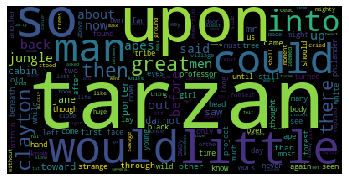

In [19]:
myimage = calculate_frequencies(tarzan_string)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

Source: https://gutenberg.org/ebooks/78